In [17]:
#Import packages
import os #Allows us to get operating system information in python.
#In artemis video, he did not import os package

#Data Handling
import pandas as pd, numpy as np

#Plotting
import matplotlib.pyplot as plt, seaborn as sns

#Saving data
import pickle

#train and test split
from sklearn.model_selection import train_test_split

#Scalers
from sklearn import preprocessing

#Tomek Liks
from imblearn.under_sampling import TomekLinks


In [3]:
#Import data

f = open('CCF_EDA_Data.pckl','rb')
pickle_list = pickle.load(f)
f.close()

data = pickle_list[0]

Steps for Processing Data

1. Split data into train and test sets (figure out split %)
2.* Deal with missing data - DON'T HAVE TO WORRY ABOUT BECAUSE NO MISSING DATA
3. Transform numerical data so distributions are closer to a Gaussian distribution - this also includes dealing with outliers
4. TRAINING DATA ONLY - Apply TomekLink algorithm to reduce dataset
5. TRAINING DATA ONLY - Randomly undersample majority class to reduce dataset
6.* Select features - DON'T HAVE TO WORRY ABOUT BECAUSE WE HAVE VERY FEW FEATURES

In [7]:
#Split the dataset into training and test
train, test = train_test_split(data,test_size=0.01,random_state=5)

In [10]:
train.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1825920,163,CASH_OUT,288726.12,C1593117495,52517.00,0.00,C1612782242,1393592.64,1682318.76,False
2986313,231,CASH_IN,162112.81,C1618820073,244228.00,406340.81,C348991627,0.00,0.00,False
3330023,253,CASH_IN,281968.13,C805318365,7039189.53,7321157.66,C1430476128,435099.86,153131.73,False
5995751,423,CASH_IN,328214.35,C1274111229,8959168.85,9287383.20,C337772977,7184636.59,6856422.24,False
5696906,397,PAYMENT,8512.96,C2026457201,0.00,0.00,M1154129826,0.00,0.00,False


KeyboardInterrupt: 

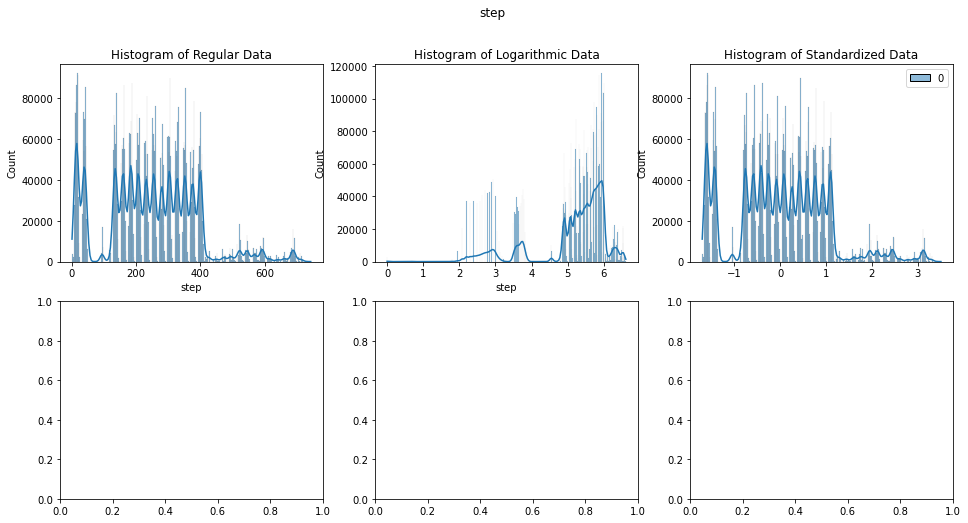

In [40]:
#TRANSFORM DATA

#Split the data into numerical and categorical
numerical_columns = [x for x in train.columns if train[x].dtype != 'object' and x != 'isFraud']
cat_columns = [x for x in train.columns if x not in numerical_columns and x != 'isFraud']
train_columns = [x for x in train.columns if x != 'isFraud']

#Numerical data
standard = preprocessing.StandardScaler()
normal = preprocessing.Normalizer()
robust = preprocessing.RobustScaler(quantile_range=(15,85)) #We're going with a large quantile range because the distributions are so large 

#Amount
nums = train[numerical_columns]

# l_nums = np.log(nums)
# s_nums = standard.fit_transform(nums)
# n_nums = normal.fit_transform(nums)
# r_nums = robust.fit_transform(nums)


#LEFT OFF AT THIS CODE; IT TAKES TOO MUCH TIME TO RUN
for col in numerical_columns:
    l_col = np.log(train[col])
    s_col = standard.fit_transform(train[col].to_numpy().reshape(-1,1))
    n_col = normal.fit_transform([train[col]])
    r_col = robust.fit_transform(train[col].to_numpy().reshape(-1,1))
    
    #Set up plots
    fig, axes = plt.subplots(2, 3, figsize=(16,8))
    fig.suptitle(format(str(col)))
    
    sns.histplot(ax=axes[0,0], data=train, x=col,kde=True)
    axes[0,0].set_title('Histogram of Regular Data')
    sns.histplot(ax=axes[0,1], data=l_col,kde=True)
    axes[0,1].set_title('Histogram of Logarithmic Data')
    sns.histplot(ax=axes[0,2], data=s_col,kde=True)
    axes[0,2].set_title('Histogram of Standardized Data')
    sns.histplot(ax=axes[1,0], data=n_col,kde=True)
    axes[1,0].set_title('Histogram of Normalized Data')
    sns.histplot(ax=axes[1,1], data=r_col,kde=True)
    axes[1,1].set_title('Histogram of Robust Scaled Data')
    
    
#normal.fit_transform([train.amount])




#Categorical data



In [12]:
numerical_columns

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest']

In [13]:
cat_columns

['type', 'nameOrig', 'nameDest']

In [ ]:
#Apply TomekLinks algorithm to majority class in training data
tlink = Tomeklinks(sampling_strategy='majority', n_jobs=2)


In [ ]:
#Randomly undersample majority class in training data

